In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./data/winequality-white.csv",sep=";")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


============================== fixed acidity ==============================


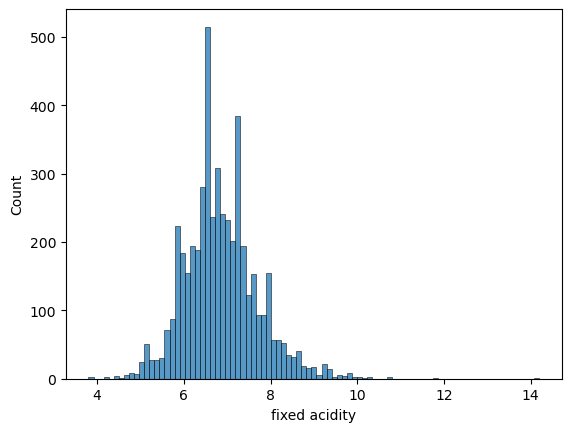

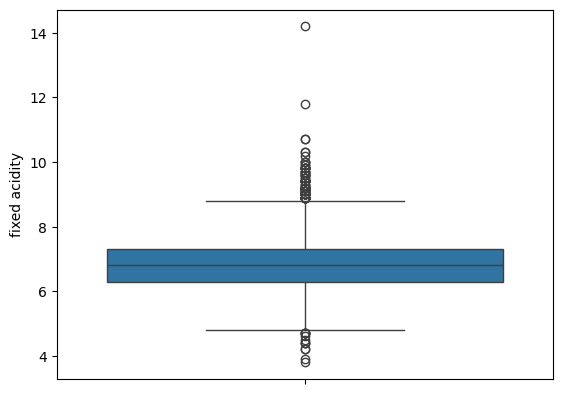

============================== volatile acidity ==============================


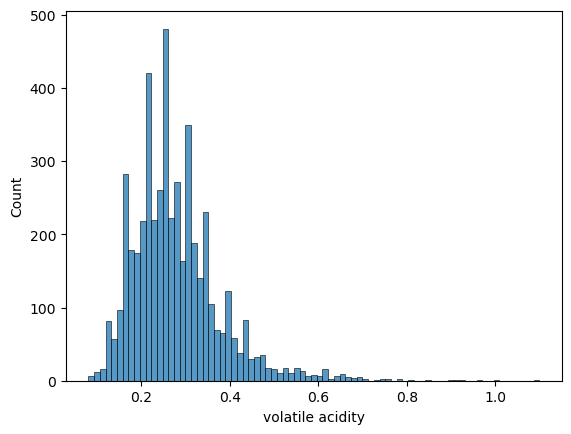

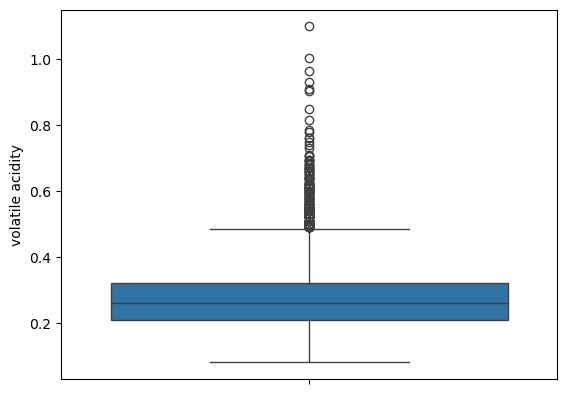

============================== citric acid ==============================


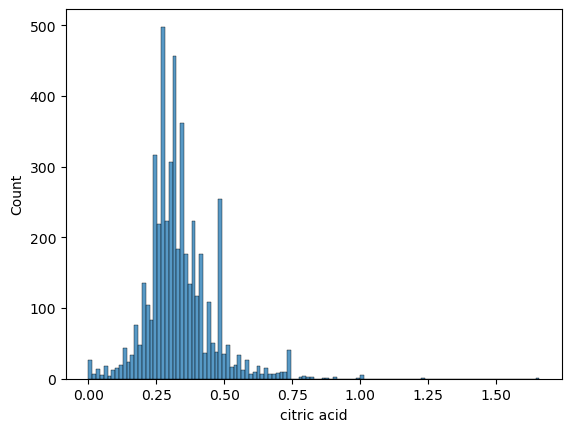

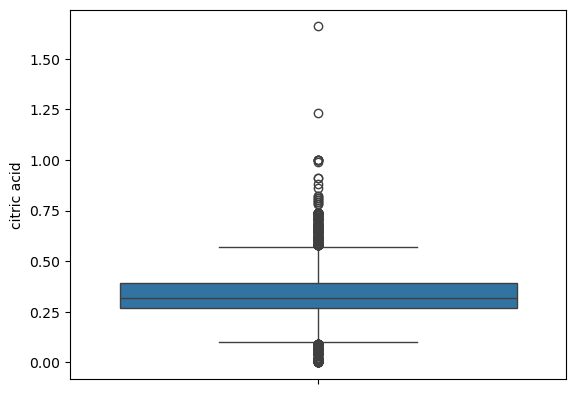

============================== residual sugar ==============================


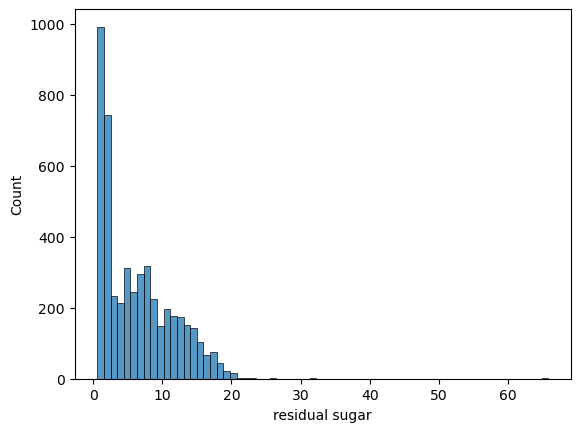

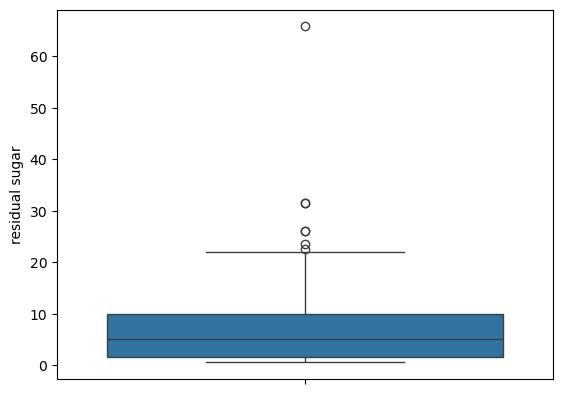

============================== chlorides ==============================


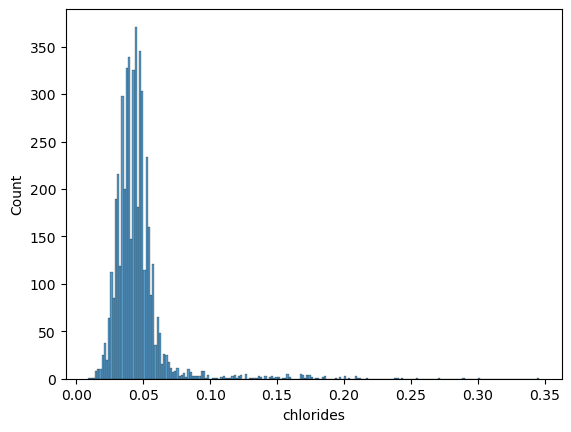

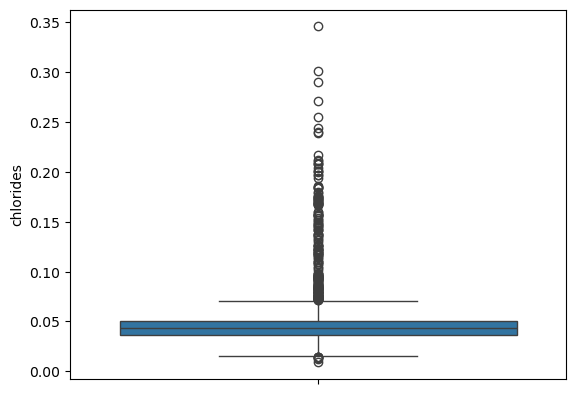

============================== free sulfur dioxide ==============================


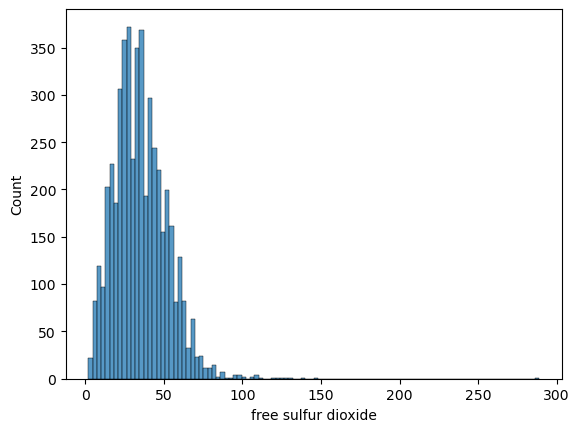

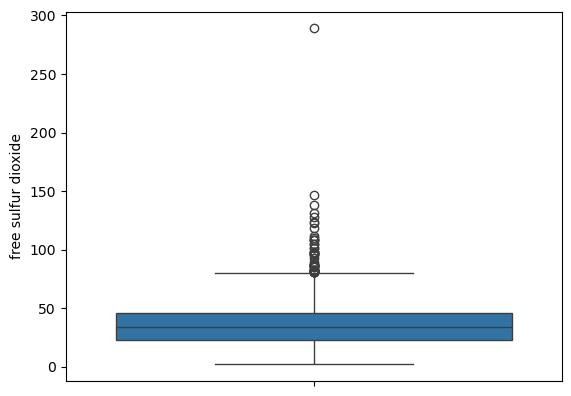

============================== total sulfur dioxide ==============================


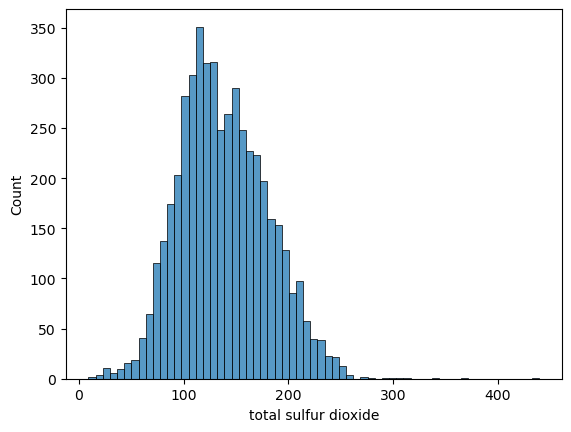

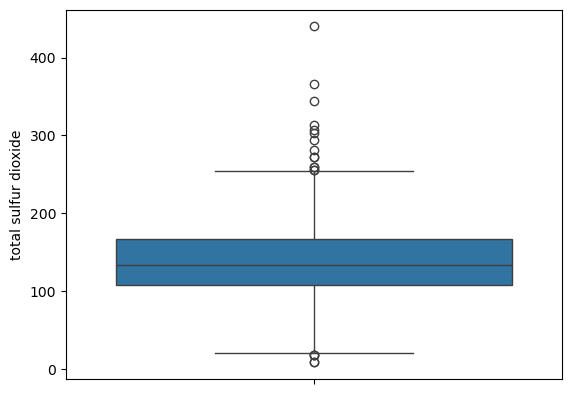

============================== density ==============================


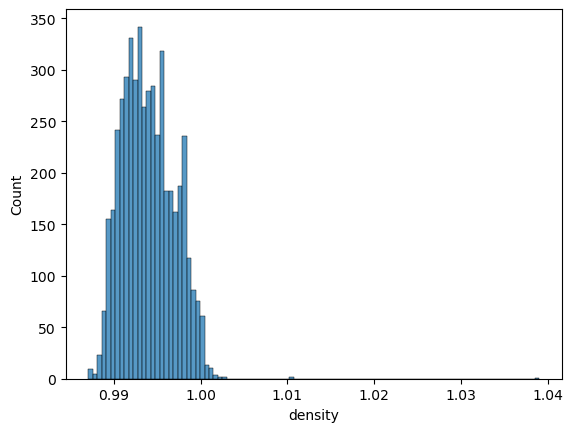

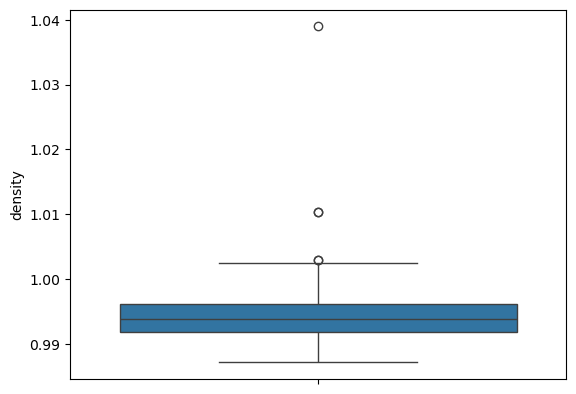

============================== pH ==============================


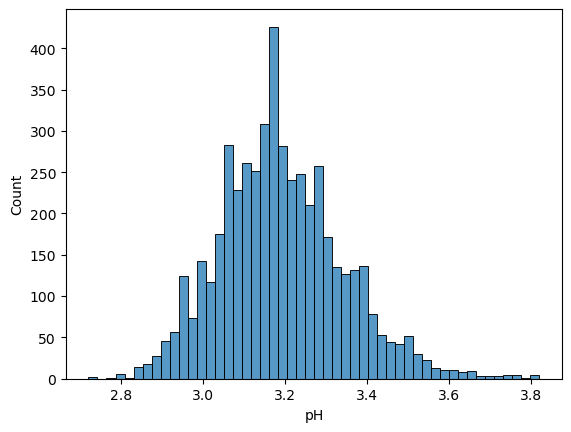

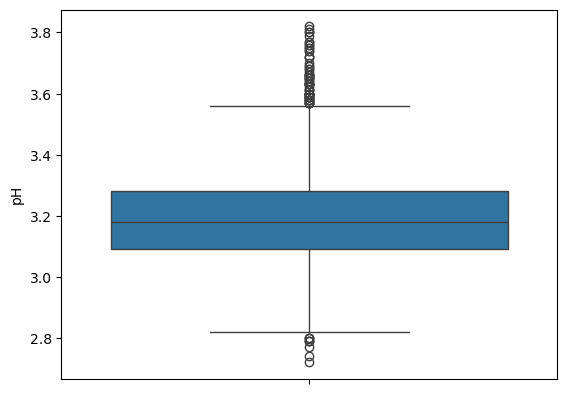

============================== sulphates ==============================


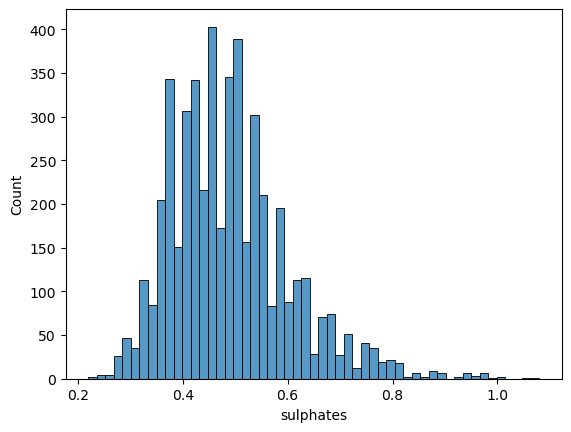

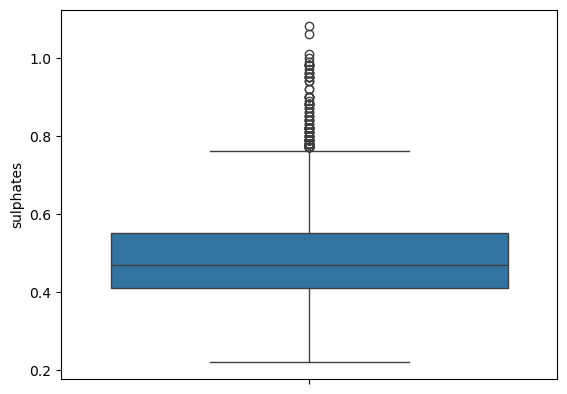

============================== alcohol ==============================


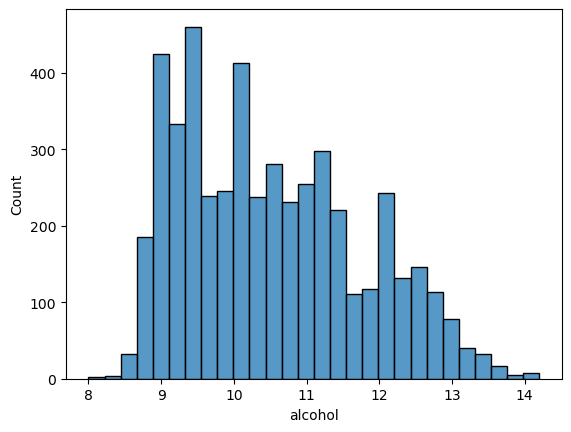

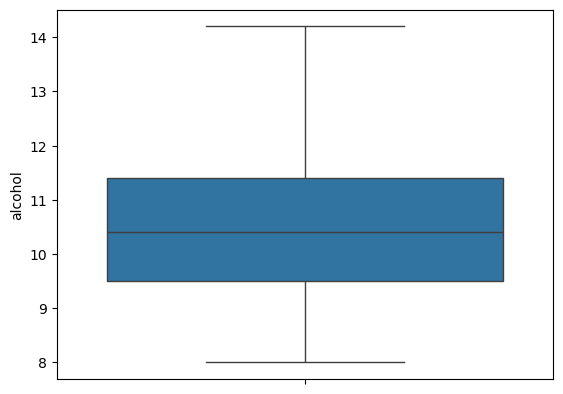

============================== quality ==============================


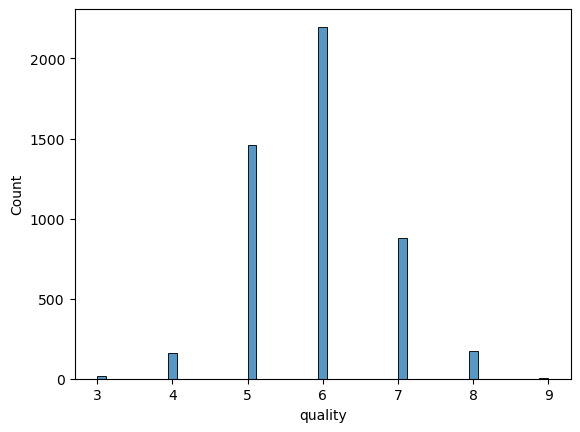

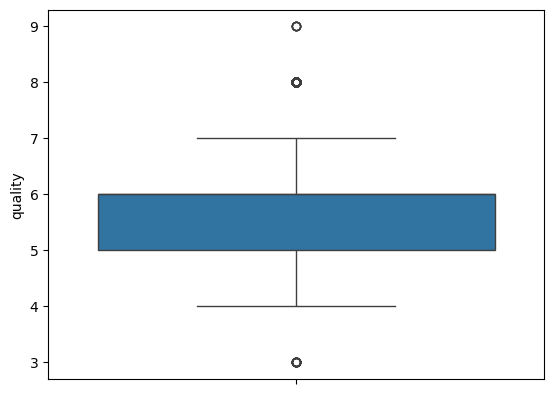

In [5]:
for col in data[:-1]:
    print("="*30,col,"="*30)
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data[col])
    plt.show()

In [6]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<Axes: >

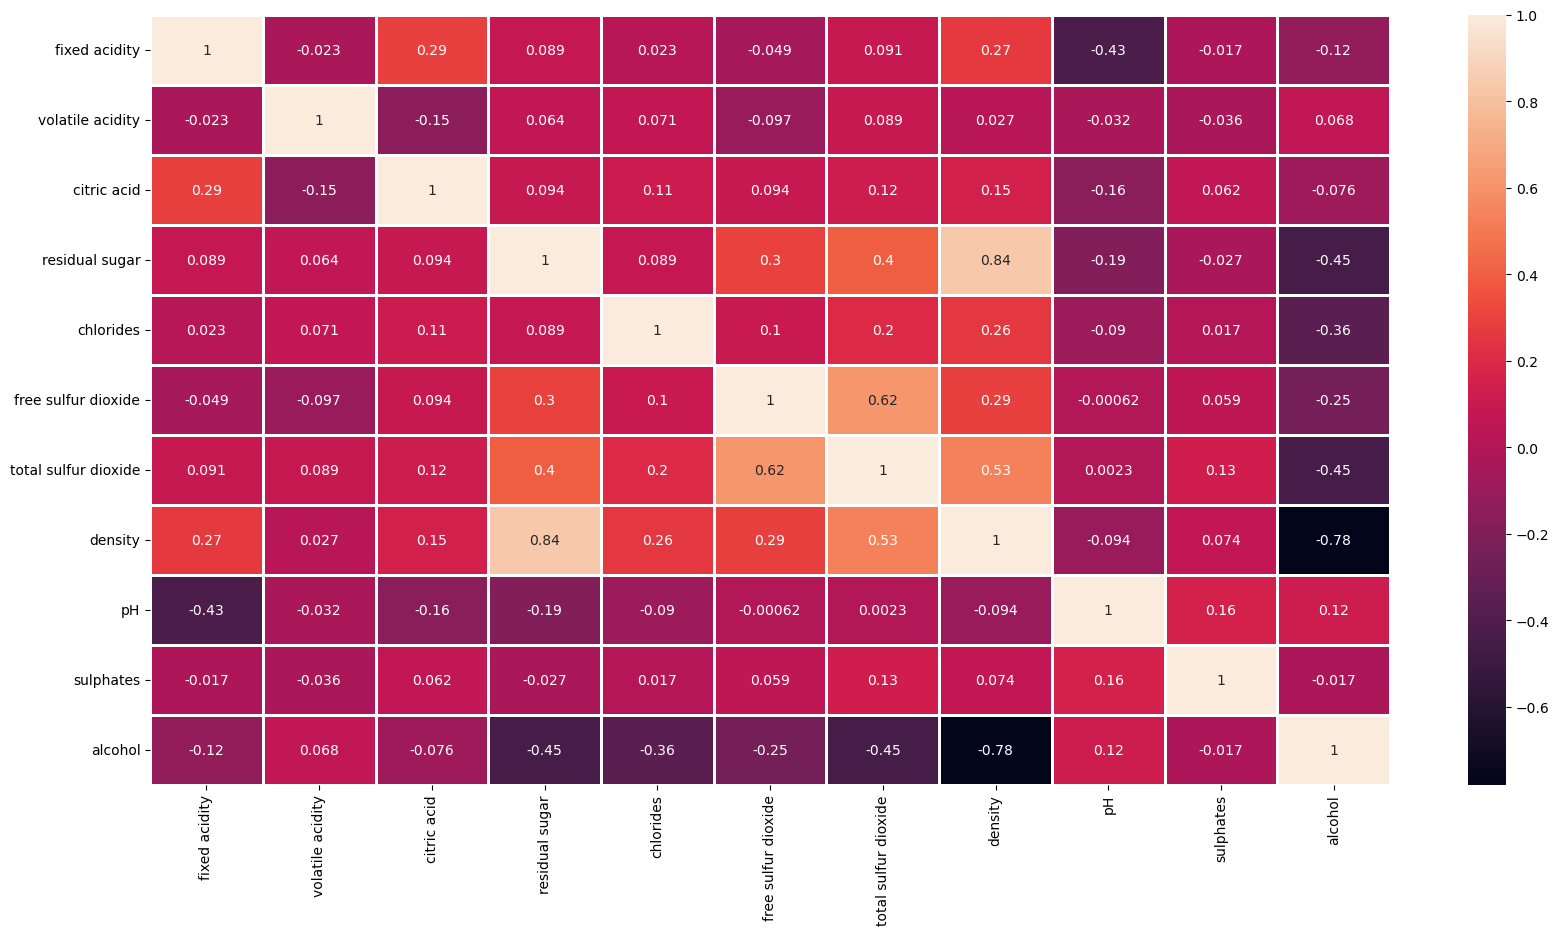

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop('quality',axis=1).corr(),annot=True,linewidths=1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [9]:
X = data.drop('quality',axis=1)
y = data['quality']

In [10]:
y.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

# 데이터를 train,vaild,test로 나누어 분석하기

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [12]:
print(len(X_train), len(X_valid), len(X_test))

2938 980 980


# 이상치가 많은 데이터이므로  RobustScaler처리

In [13]:
rs = RobustScaler()
rs.fit(X_train)
train_temp = rs.transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index= X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index= X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index= X_test.index)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

# 모델의 최고성능에서 저장하고 중지하기

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.callbacks import EarlyStopping,ModelCheckpoint

2025-12-03 14:41:00.295839: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 14:41:00.340109: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-03 14:41:01.498082: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [16]:
y_train.shape

(2938,)

In [17]:
n_class = 7
model2 = Sequential()
model2.add(Input(shape=(rs_X_train.shape[1], )))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(n_class, activation='softmax'))
model2.summary()

I0000 00:00:1764740461.946235   98982 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import os

In [19]:
os.makedirs("./model",exist_ok=True) # model 디렉토리 자동 생성

# 불균형 데이터의 클래스에 가중치 주기

In [20]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))
class_weights

{np.int64(0): np.float64(34.976190476190474),
 np.int64(1): np.float64(4.282798833819242),
 np.int64(2): np.float64(0.4802222948676038),
 np.int64(3): np.float64(0.31844786473011055),
 np.int64(4): np.float64(0.7949134199134199),
 np.int64(5): np.float64(3.9972789115646257),
 np.int64(6): np.float64(139.9047619047619)}

Epoch 1/1000


2025-12-03 14:41:03.643336: I external/local_xla/xla/service/service.cc:163] XLA service 0x7e04b800a9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-03 14:41:03.643374: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-03 14:41:03.660961: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 14:41:03.773094: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


73/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2379 - loss: 1.9444

I0000 00:00:1764740464.919189   99023 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2151 - loss: 1.9053 - val_accuracy: 0.1959 - val_loss: 1.9109
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1654 - loss: 1.7902 - val_accuracy: 0.0755 - val_loss: 1.9025
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0817 - loss: 1.6681 - val_accuracy: 0.1153 - val_loss: 1.8462
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1879 - loss: 1.5839 - val_accuracy: 0.1684 - val_loss: 1.7857
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1950 - loss: 1.4485 - val_accuracy: 0.2133 - val_loss: 1.7252
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2328 - loss: 1.3517 - val_accuracy: 0.2153 - val_loss: 1.6754
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2750 - loss: 1.3000 - val_accuracy: 0.3429 - val_loss: 1.5723
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3206 - loss: 1.2244 - val_accuracy: 0.3347 - val_l

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 0.6412 - val_accuracy: 0.4173 - val_loss: 1.3325
Epoch 52/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4864 - loss: 0.6345 - val_accuracy: 0.4531 - val_loss: 1.2953
Epoch 53/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4952 - loss: 0.6315 - val_accuracy: 0.4296 - val_loss: 1.3366
Epoch 54/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4918 - loss: 0.6247 - val_accuracy: 0.4173 - val_loss: 1.3371
Epoch 55/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4976 - loss: 0.6284 - val_accuracy: 0.3969 - val_loss: 1.3749
Epoch 56/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4789 - loss: 0.6154 - val_accuracy: 0.4755 - val_loss: 1.2539
Epoch 57/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5071 - loss: 0.6105 - val_accuracy: 0.4429 - val_loss: 1.2920
Epoch 58/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4969 - loss: 0.6037 - val_accuracy: 0.3816 -

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5769 - loss: 0.4525 - val_accuracy: 0.4806 - val_loss: 1.3571
Epoch 102/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5694 - loss: 0.4608 - val_accuracy: 0.4643 - val_loss: 1.4062
Epoch 103/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5735 - loss: 0.4520 - val_accuracy: 0.4755 - val_loss: 1.4058
Epoch 104/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 0.4463 - val_accuracy: 0.4939 - val_loss: 1.4094
Epoch 105/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5752 - loss: 0.4509 - val_accuracy: 0.4612 - val_loss: 1.4426
Epoch 106/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5722 - loss: 0.4541 - val_accuracy: 0.4867 - val_loss: 1.3983
Epoch 107/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5868 - loss: 0.4405 - val_accuracy: 0.4990 - val_loss: 1.4066
Epoch 108/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5830 - loss: 0.4424 - val_accuracy: 

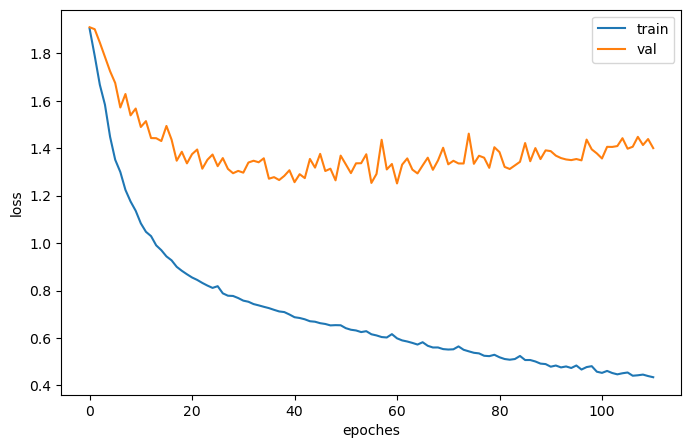

In [21]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=50)
filepath = "./model/witewine_best_model2.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model2.fit(rs_X_train, y_train, epochs=1000, batch_size=32, class_weight=class_weights,
                    validation_data=(rs_X_valid, y_valid), callbacks=[early_stop, model_save])
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()    

# 베스트모델 불러와서 예측

In [24]:
from keras.models import load_model

In [25]:
best_model2 = load_model("./model/witewine_best_model2.keras")
pred2 = best_model2.predict(rs_X_test)
pred2

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[3.1049494e-05, 1.4553930e-01, 6.5489888e-01, ..., 4.3700286e-03,
        1.0977389e-04, 6.5452102e-11],
       [6.3830829e-04, 7.3158717e-01, 1.9239311e-01, ..., 3.9587202e-03,
        2.9461810e-04, 3.6462008e-10],
       [1.5574575e-03, 9.3351128e-03, 6.1677235e-01, ..., 2.8667428e-02,
        3.2546575e-04, 4.0850195e-10],
       ...,
       [8.0457712e-06, 6.4480300e-03, 2.1275792e-02, ..., 1.6019550e-01,
        4.3818033e-01, 2.5975341e-01],
       [7.0156733e-04, 1.0555264e-02, 5.1016581e-01, ..., 4.0212154e-02,
        1.2885438e-02, 1.0358415e-10],
       [3.6065883e-04, 6.1923132e-04, 3.5601592e-01, ..., 8.5047804e-02,
        6.9522161e-05, 6.7129015e-12]], shape=(980, 7), dtype=float32)

In [26]:
best_model2.evaluate(rs_X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4429 - loss: 1.2585


[1.2584707736968994, 0.44285714626312256]